<a href="https://colab.research.google.com/github/i-am-batman-28/Banking-Dataset-Model/blob/main/Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/s1.csv')

In [3]:
df.head()

,date,time,open,high,low,close,volume,open_interest
0,2017-01-02,09:15:00,100.00,100.28,100.00,100.02,7000.0,100000.0
1,2017-01-02,09:16:00,100.02,100.07,100.02,100.06,3509.0,101212.0
2,2017-01-02,09:17:00,100.05,100.06,99.70,99.73,5105.0,101212.0
3,2017-01-02,09:18:00,99.71,99.79,99.63,99.79,4959.0,101212.0
4,2017-01-02,09:19:00,99.78,99.82,99.69,99.70,2398.0,102480.0


In [85]:
df

,date,time,open,high,low,close,volume,open_interest
0,2017-01-02,09:15:00,100.00,100.28,100.00,100.02,7000.0,100000.0
1,2017-01-02,09:16:00,100.02,100.07,100.02,100.06,3509.0,101212.0
2,2017-01-02,09:17:00,100.05,100.06,99.70,99.73,5105.0,101212.0
3,2017-01-02,09:18:00,99.71,99.79,99.63,99.79,4959.0,101212.0
4,2017-01-02,09:19:00,99.78,99.82,99.69,99.70,2398.0,102480.0
...,...,...,...,...,...,...,...,...
65828,2017-09-15,15:13:00,136.47,136.47,136.46,136.47,1532.0,123805.0
65829,2017-09-15,15:14:00,136.46,136.49,136.44,136.47,2433.0,123805.0
65830,2017-09-15,15:15:00,136.49,136.50,136.45,136.48,1789.0,123805.0
65831,2017-09-15,15:16:00,136.48,136.49,136.47,136.49,1240.0,123622.0


In [107]:
df.describe()

,open,high,low,close,volume,open_interest
count,65833.000000,65833.000000,65833.000000,65832.000000,65832.000000,65832.000000
mean,122.299854,122.324621,122.273793,122.299872,1099.530472,130418.430475
std,10.421539,10.421160,10.430107,10.421242,1461.021361,25710.010454
min,98.160000,98.210000,13.000000,98.160000,6.000000,50677.000000
25%,114.290000,114.310000,114.260000,114.290000,316.000000,113967.000000
50%,124.850000,124.880000,124.820000,124.850000,626.000000,129080.000000
75%,131.170000,131.190000,131.150000,131.170000,1310.000000,145057.000000
max,138.670000,138.710000,138.550000,138.660000,48992.000000,196359.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65833 entries, 0 to 65832
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           65833 non-null  object 
 1   time           65833 non-null  object 
 2   open           65833 non-null  float64
 3   high           65833 non-null  float64
 4   low            65833 non-null  float64
 5   close          65832 non-null  float64
 6   volume         65832 non-null  float64
 7   open_interest  65832 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.0+ MB


In [11]:
df.isna().sum()

date             0
time             0
open             0
high             0
low              0
close            1
volume           1
open_interest    1
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])

<ipython-input-7-2fda726a02c3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65833 entries, 0 to 65832
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           65833 non-null  datetime64[ns]
 1   time           65833 non-null  datetime64[ns]
 2   open           65833 non-null  float64       
 3   high           65833 non-null  float64       
 4   low            65833 non-null  float64       
 5   close          65832 non-null  float64       
 6   volume         65832 non-null  float64       
 7   open_interest  65832 non-null  float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 4.0 MB


In [8]:
num = ['open', 'close', 'high', 'low', 'volume', 'open_interest']
cat = df.columns[df.dtypes == 'object']

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [10]:
si = SimpleImputer(strategy = 'mean')
df[['close', 'volume','open_interest' ]] = si.fit_transform(df[['close', 'volume','open_interest' ]])

In [12]:
df.isna().sum()

date             0
time             0
open             0
high             0
low              0
close            0
volume           0
open_interest    0
dtype: int64

In [42]:
df.isna().sum()

date             0
time             0
open             0
high             0
low              0
close            0
volume           0
open_interest    0
dtype: int64

In [12]:
for column in num:
    se = StandardScaler()
    df[column] = se.fit_transform(df[[column]])


In [13]:
def features(df, p =60):
  for n in range(1, p+1):
        df[f'close_feature{n}'] = df['close'].shift(n)
        df[f'high_feature{n}'] = df['high'].shift(n)
        df[f'low_feature{n}'] = df['low'].shift(n)
        df[f'volume_feature{n}'] = df['volume'].shift(n)
  df.dropna(inplace=True)
  return df

df = features(df, p=60)


<ipython-input-13-f992545ffd85>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'close_feature{n}'] = df['close'].shift(n)
<ipython-input-13-f992545ffd85>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'high_feature{n}'] = df['high'].shift(n)
<ipython-input-13-f992545ffd85>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

In [5]:
dfn = df.sample(frac=0.2, random_state=42)


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
datetime_columns = dfn.select_dtypes(include=['datetime']).columns
numerical_columns = dfn.select_dtypes(include=['number']).columns.difference(datetime_columns)
to_fit = dfn[numerical_columns]
feature_columns = [i for i in dfn.columns if 'feature' in i]
features = dfn[feature_columns]


In [21]:
K = range(2, 7)
silhouette_scores = []

for n in K:
    km = KMeans(n_clusters=n, random_state = 42, n_init = 7)
    km.fit(to_fit)
    lb = km.labels_
    silhouette_scores.append(silhouette_score(to_fit, lb))

ideal_k_indexing = silhouette_scores.index(max(silhouette_scores))
ideal_k = K[ideal_k_indexing]
print(ideal_k)

6


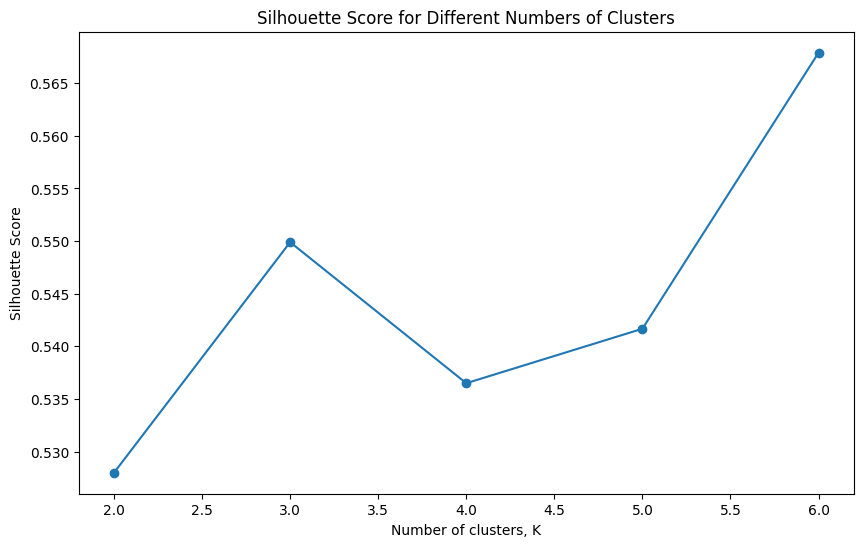

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.show()


In [25]:
kmm = KMeans(n_clusters = ideal_k, n_init = 7, random_state = 42)
dfn['clusters'] =kmm.fit_predict(to_fit)
print(dfn)



             date      time    open    high     low   close  volume  \
34183  2017-05-17  10:13:00  125.90  125.90  125.85  125.86   433.0   
19811  2017-03-20  14:26:00  116.32  116.34  116.32  116.34   222.0   
16591  2017-03-07  10:46:00  113.60  113.61  113.58  113.58   269.0   
51476  2017-07-21  13:31:00  132.50  132.55  132.50  132.55   439.0   
33605  2017-05-15  13:05:00  125.34  125.34  125.30  125.31   620.0   
...           ...       ...     ...     ...     ...     ...     ...   
45339  2017-06-28  14:54:00  127.35  127.40  127.35  127.36   637.0   
13267  2017-02-21  11:37:00  113.30  113.32  113.28  113.31   357.0   
15517  2017-03-02  11:37:00  114.97  114.98  114.96  114.96   357.0   
30330  2017-05-02  14:45:00  122.86  122.91  122.86  122.91   368.0   
54609  2017-08-03  09:29:00  137.26  137.29  137.26  137.28  1415.0   

       open_interest  clusters  
34183       182602.0         2  
19811       116105.0         3  
16591       125742.0         3  
51476       141

In [4]:
import seaborn as sns

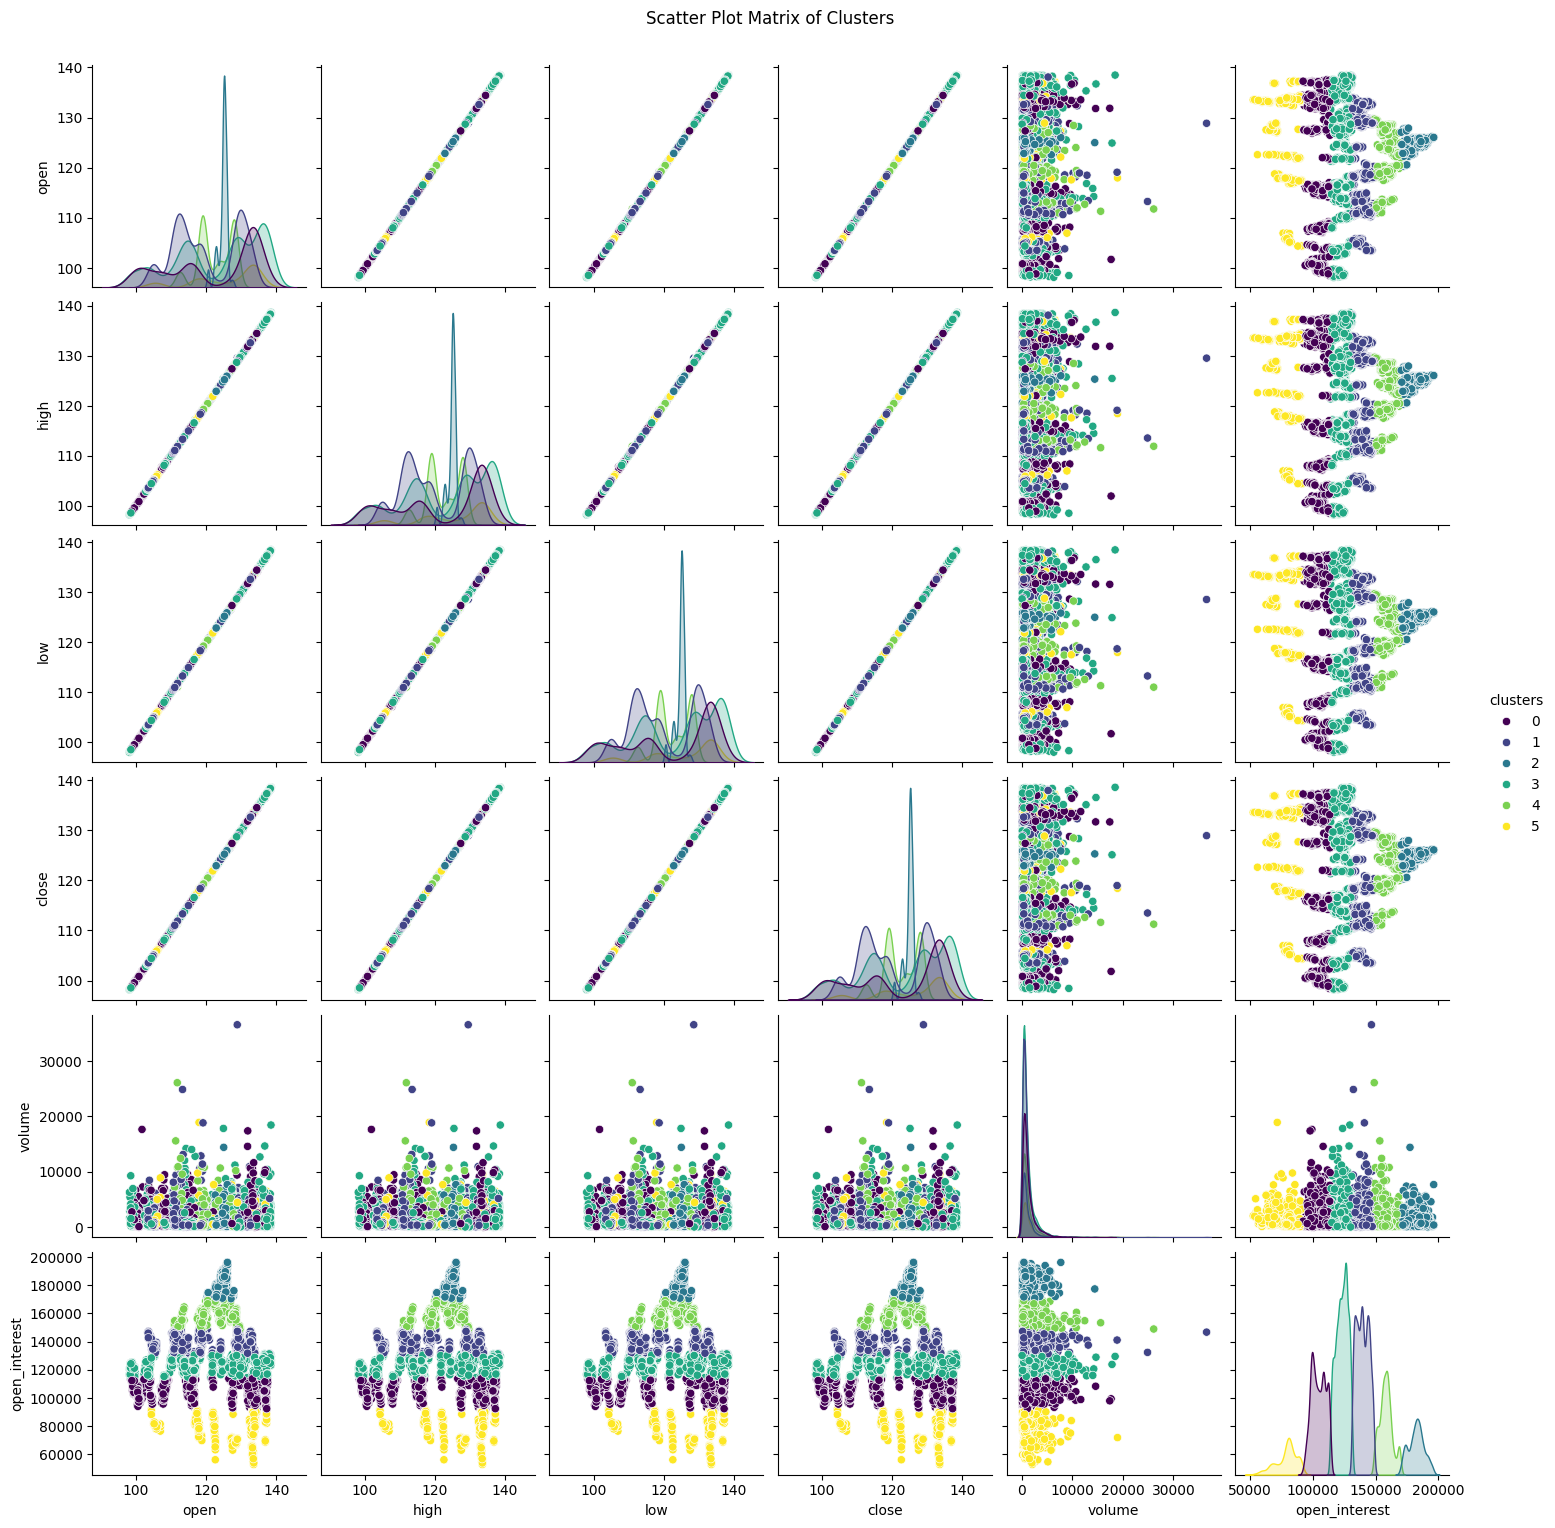

In [30]:
sns.pairplot(dfn,hue = 'clusters', palette='viridis', markers='o')
plt.suptitle("Scatter Plot Matrix of Clusters", y=1.02)
plt.show()
